<a href="https://colab.research.google.com/github/Huynh-Truong-75/-Final-Project/blob/main/NhanDangThuNgu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import warnings
import cv2
import keras
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
from PIL import Image
from keras import models, layers, optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

**https://drive.google.com/drive/folders/1UUoGtqByLTNhm2y21-xnOdfj-l8l85ua?usp=sharing**

In [ ]:
# Dinh nghia cac bien

label = {'L_': 'L',
         'fi': 'E',
         'ok': 'F',
         'pe': 'V',
         'pa': 'B'
        }

label_map = {'E': 0,
             'L': 1,
             'F': 2,
             'V': 3,
             'B': 4
            }


output = {0: 'E',
          1: 'L',
          2: 'F',
          3: 'V',
          4: 'B'}


character = '/content/drive/MyDrive/data_train1'
models_path = '/content/drive/MyDrive/handd.hdf5'
rgb = False

In [ ]:
# Ham xu ly anh resize ve 224x224 va chuyen ve numpy array
def process_image(path):
    img = Image.open(path)
    img = img.resize((224, 224))
    img = np.array(img)
    return img

# Xu ly du lieu dau vao
def process_data(X_data, y_data):
    X_data = np.array(X_data, dtype = 'float32')
    if rgb:
        pass
    else:
        X_data = np.stack((X_data,)*3, axis=-1)
    X_data /= 255
    y_data = np.array(y_data)
    y_data = to_categorical(y_data)
    return X_data, y_data

# Ham duuyet thu muc anh dung de train
def data_initialization(image_path):
    X_data = []
    y_data = []
    for directory, subdirectories, files in os.walk(image_path):
        for file in files:
            if not file.startswith('.'):
                path = os.path.join(directory, file)
                name = label[file[0:2]]
                y_data.append(label_map[name])
                X_data.append(process_image(path))

            else:
                continue

    X_data, y_data = process_data(X_data, y_data)
    return X_data, y_data


# Load du lieu vao X va Y
X_data, y_data = data_initialization(character)

# Phan chia du lieu train va test theo ty le 80/20
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=12, stratify=y_data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Dat cac checkpoint de luu lai model tot nhat
model_checkpoint = ModelCheckpoint(filepath=models_path, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_acc',
                               min_delta=0,
                               patience=10,
                               verbose=1,
                               mode='auto',
                               restore_best_weights=True)

In [ ]:
# Khoi tao model
model = Sequential()

model.add(Conv2D(64, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block1_conv1', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block1_conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block1_maxpool'))

model.add(Conv2D(128, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block2_conv1'))
model.add(Conv2D(128, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block2_conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block2_maxpool'))

model.add(Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv1'))
model.add(Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv2'))
model.add(Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block3_maxpool'))

model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv1'))
model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv2'))
model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block4_maxpool'))

model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block5_conv1'))
model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block5_conv2'))
model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block5_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block5_maxpool'))

model.add(Flatten())
model.add(Dense(512, activation='relu')) 
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_maxpool (MaxPooling2  (None, 112, 112, 64)     0         
 D)                                                              
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_maxpool (MaxPooling2  (None, 56, 56, 128)      0         
 D)                                                     

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=1,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
48/48 [==============================] - ETA: 0s - loss: 1.7325 - accuracy: 0.2093

48/48 [==============================] - 76s 1s/step - loss: 1.7325 - accuracy: 0.2093 - val_loss: 1.5920 - val_accuracy: 0.1987
Epoch 2/50
48/48 [==============================] - ETA: 0s - loss: 1.4894 - accuracy: 0.3231

48/48 [==============================] - 51s 1s/step - loss: 1.4894 - accuracy: 0.3231 - val_loss: 1.4933 - val_accuracy: 0.2947
Epoch 3/50
48/48 [==============================] - ETA: 0s - loss: 1.3195 - accuracy: 0.4265

48/48 [==============================] - 46s 964ms/step - loss: 1.3195 - accuracy: 0.4265 - val_loss: 1.2842 - val_accuracy: 0.4553
Epoch 4/50
48/48 [==============================] - ETA: 0s - loss: 0.7869 - accuracy: 0.6828

48/48 [==============================] - 46s 962ms/step - loss: 0.7869 - accuracy: 0.6828 - val_loss: 0.4908 - val_accuracy: 0.8158
Epoch 5/50
48/48 [==============================] - ETA: 0s - loss: 0.3699 - accuracy: 0.8694

48/48 [==============================] - 46s 968ms/step - loss: 0.3699 - accuracy: 0.8694 - val_loss: 0.2368 - val_accuracy: 0.9434
Epoch 6/50
48/48 [==============================] - ETA: 0s - loss: 0.1887 - accuracy: 0.9503

48/48 [==============================] - 42s 885ms/step - loss: 0.1887 - accuracy: 0.9503 - val_loss: 0.2693 - val_accuracy: 0.9329
Epoch 7/50
48/48 [==============================] - ETA: 0s - loss: 0.1378 - accuracy: 0.9569

48/48 [==============================] - 50s 1s/step - loss: 0.1378 - accuracy: 0.9569 - val_loss: 0.1943 - val_accuracy: 0.9342
Epoch 8/50
48/48 [==============================] - ETA: 0s - loss: 0.1326 - accuracy: 0.9599

48/48 [==============================] - 47s 975ms/step - loss: 0.1326 - accuracy: 0.9599 - val_loss: 0.0780 - val_accuracy: 0.9737
Epoch 9/50
48/48 [==============================] - ETA: 0s - loss: 0.0884 - accuracy: 0.9717

48/48 [==============================] - 42s 885ms/step - loss: 0.0884 - accuracy: 0.9717 - val_loss: 0.1050 - val_accuracy: 0.9618
Epoch 10/50
48/48 [==============================] - ETA: 0s - loss: 0.0529 - accuracy: 0.9842

48/48 [==============================] - 42s 885ms/step - loss: 0.0529 - accuracy: 0.9842 - val_loss: 0.1095 - val_accuracy: 0.9737
Epoch 11/50
48/48 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.9809

48/48 [==============================] - 42s 881ms/step - loss: 0.0657 - accuracy: 0.9809 - val_loss: 0.2624 - val_accuracy: 0.9526
Epoch 12/50
48/48 [==============================] - ETA: 0s - loss: 0.0786 - accuracy: 0.9753

48/48 [==============================] - 42s 883ms/step - loss: 0.0786 - accuracy: 0.9753 - val_loss: 0.1037 - val_accuracy: 0.9750
Epoch 13/50
48/48 [==============================] - ETA: 0s - loss: 0.1108 - accuracy: 0.9694

48/48 [==============================] - 42s 882ms/step - loss: 0.1108 - accuracy: 0.9694 - val_loss: 0.1946 - val_accuracy: 0.9421
Epoch 14/50
48/48 [==============================] - ETA: 0s - loss: 0.0740 - accuracy: 0.9829

48/48 [==============================] - 42s 880ms/step - loss: 0.0740 - accuracy: 0.9829 - val_loss: 0.0801 - val_accuracy: 0.9789
Epoch 15/50
48/48 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9934

48/48 [==============================] - 46s 957ms/step - loss: 0.0185 - accuracy: 0.9934 - val_loss: 0.0761 - val_accuracy: 0.9789
Epoch 16/50
48/48 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.9970

48/48 [==============================] - 42s 885ms/step - loss: 0.0070 - accuracy: 0.9970 - val_loss: 0.0826 - val_accuracy: 0.9842
Epoch 17/50
48/48 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9967

48/48 [==============================] - 42s 880ms/step - loss: 0.0077 - accuracy: 0.9967 - val_loss: 0.2906 - val_accuracy: 0.9671
Epoch 18/50
48/48 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9895

48/48 [==============================] - 42s 880ms/step - loss: 0.0413 - accuracy: 0.9895 - val_loss: 0.1068 - val_accuracy: 0.9776
Epoch 19/50
48/48 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9967

48/48 [==============================] - 42s 881ms/step - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.1097 - val_accuracy: 0.9803
Epoch 20/50
48/48 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9984

48/48 [==============================] - 42s 881ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0983 - val_accuracy: 0.9855
Epoch 21/50
48/48 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9993

48/48 [==============================] - 42s 881ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.1135 - val_accuracy: 0.9855
Epoch 22/50
48/48 [==============================] - ETA: 0s - loss: 4.6561e-04 - accuracy: 0.9997

48/48 [==============================] - 42s 881ms/step - loss: 4.6561e-04 - accuracy: 0.9997 - val_loss: 0.1278 - val_accuracy: 0.9855
Epoch 23/50
48/48 [==============================] - ETA: 0s - loss: 1.7409e-04 - accuracy: 1.0000

48/48 [==============================] - 42s 880ms/step - loss: 1.7409e-04 - accuracy: 1.0000 - val_loss: 0.1264 - val_accuracy: 0.9842
Epoch 24/50
48/48 [==============================] - ETA: 0s - loss: 4.9974e-05 - accuracy: 1.0000

48/48 [==============================] - 42s 880ms/step - loss: 4.9974e-05 - accuracy: 1.0000 - val_loss: 0.1303 - val_accuracy: 0.9842
Epoch 25/50
48/48 [==============================] - ETA: 0s - loss: 2.4420e-05 - accuracy: 1.0000

48/48 [==============================] - 42s 879ms/step - loss: 2.4420e-05 - accuracy: 1.0000 - val_loss: 0.1341 - val_accuracy: 0.9842
Epoch 26/50
48/48 [==============================] - ETA: 0s - loss: 1.5627e-05 - accuracy: 1.0000

48/48 [==============================] - 42s 881ms/step - loss: 1.5627e-05 - accuracy: 1.0000 - val_loss: 0.1376 - val_accuracy: 0.9842
Epoch 27/50
48/48 [==============================] - ETA: 0s - loss: 1.1027e-05 - accuracy: 1.0000

48/48 [==============================] - 42s 880ms/step - loss: 1.1027e-05 - accuracy: 1.0000 - val_loss: 0.1398 - val_accuracy: 0.9842
Epoch 28/50
48/48 [==============================] - ETA: 0s - loss: 8.3826e-06 - accuracy: 1.0000

48/48 [==============================] - 42s 880ms/step - loss: 8.3826e-06 - accuracy: 1.0000 - val_loss: 0.1421 - val_accuracy: 0.9842
Epoch 29/50
48/48 [==============================] - ETA: 0s - loss: 6.6712e-06 - accuracy: 1.0000

48/48 [==============================] - 42s 881ms/step - loss: 6.6712e-06 - accuracy: 1.0000 - val_loss: 0.1446 - val_accuracy: 0.9842
Epoch 30/50
48/48 [==============================] - ETA: 0s - loss: 5.3372e-06 - accuracy: 1.0000

48/48 [==============================] - 42s 880ms/step - loss: 5.3372e-06 - accuracy: 1.0000 - val_loss: 0.1534 - val_accuracy: 0.9842
Epoch 31/50
48/48 [==============================] - ETA: 0s - loss: 4.1149e-06 - accuracy: 1.0000

48/48 [==============================] - 42s 879ms/step - loss: 4.1149e-06 - accuracy: 1.0000 - val_loss: 0.1635 - val_accuracy: 0.9855
Epoch 32/50
48/48 [==============================] - ETA: 0s - loss: 3.2036e-06 - accuracy: 1.0000

48/48 [==============================] - 42s 881ms/step - loss: 3.2036e-06 - accuracy: 1.0000 - val_loss: 0.1709 - val_accuracy: 0.9855
Epoch 33/50
48/48 [==============================] - ETA: 0s - loss: 2.6451e-06 - accuracy: 1.0000

48/48 [==============================] - 42s 880ms/step - loss: 2.6451e-06 - accuracy: 1.0000 - val_loss: 0.1792 - val_accuracy: 0.9855
Epoch 34/50
48/48 [==============================] - ETA: 0s - loss: 2.1850e-06 - accuracy: 1.0000

48/48 [==============================] - 42s 880ms/step - loss: 2.1850e-06 - accuracy: 1.0000 - val_loss: 0.1788 - val_accuracy: 0.9855
Epoch 35/50
48/48 [==============================] - ETA: 0s - loss: 1.7431e-06 - accuracy: 1.0000

48/48 [==============================] - 42s 882ms/step - loss: 1.7431e-06 - accuracy: 1.0000 - val_loss: 0.1845 - val_accuracy: 0.9855
Epoch 36/50
48/48 [==============================] - ETA: 0s - loss: 1.4208e-06 - accuracy: 1.0000

48/48 [==============================] - 42s 879ms/step - loss: 1.4208e-06 - accuracy: 1.0000 - val_loss: 0.1860 - val_accuracy: 0.9855
Epoch 37/50
48/48 [==============================] - ETA: 0s - loss: 1.1106e-06 - accuracy: 1.0000

48/48 [==============================] - 42s 880ms/step - loss: 1.1106e-06 - accuracy: 1.0000 - val_loss: 0.1917 - val_accuracy: 0.9855
Epoch 38/50
48/48 [==============================] - ETA: 0s - loss: 9.5515e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 882ms/step - loss: 9.5515e-07 - accuracy: 1.0000 - val_loss: 0.2019 - val_accuracy: 0.9855
Epoch 39/50
48/48 [==============================] - ETA: 0s - loss: 7.4192e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 880ms/step - loss: 7.4192e-07 - accuracy: 1.0000 - val_loss: 0.1982 - val_accuracy: 0.9855
Epoch 40/50
48/48 [==============================] - ETA: 0s - loss: 6.1840e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 881ms/step - loss: 6.1840e-07 - accuracy: 1.0000 - val_loss: 0.2018 - val_accuracy: 0.9855
Epoch 41/50
48/48 [==============================] - ETA: 0s - loss: 5.0486e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 880ms/step - loss: 5.0486e-07 - accuracy: 1.0000 - val_loss: 0.2073 - val_accuracy: 0.9855
Epoch 42/50
48/48 [==============================] - ETA: 0s - loss: 4.3637e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 881ms/step - loss: 4.3637e-07 - accuracy: 1.0000 - val_loss: 0.2094 - val_accuracy: 0.9855
Epoch 43/50
48/48 [==============================] - ETA: 0s - loss: 3.6946e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 881ms/step - loss: 3.6946e-07 - accuracy: 1.0000 - val_loss: 0.2113 - val_accuracy: 0.9855
Epoch 44/50
48/48 [==============================] - ETA: 0s - loss: 3.2325e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 881ms/step - loss: 3.2325e-07 - accuracy: 1.0000 - val_loss: 0.2133 - val_accuracy: 0.9855
Epoch 45/50
48/48 [==============================] - ETA: 0s - loss: 2.9125e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 880ms/step - loss: 2.9125e-07 - accuracy: 1.0000 - val_loss: 0.2181 - val_accuracy: 0.9855
Epoch 46/50
48/48 [==============================] - ETA: 0s - loss: 2.5877e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 882ms/step - loss: 2.5877e-07 - accuracy: 1.0000 - val_loss: 0.2196 - val_accuracy: 0.9855
Epoch 47/50
48/48 [==============================] - ETA: 0s - loss: 2.3865e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 881ms/step - loss: 2.3865e-07 - accuracy: 1.0000 - val_loss: 0.2235 - val_accuracy: 0.9855
Epoch 48/50
48/48 [==============================] - ETA: 0s - loss: 2.0742e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 881ms/step - loss: 2.0742e-07 - accuracy: 1.0000 - val_loss: 0.2237 - val_accuracy: 0.9868
Epoch 49/50
48/48 [==============================] - ETA: 0s - loss: 1.9075e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 881ms/step - loss: 1.9075e-07 - accuracy: 1.0000 - val_loss: 0.2265 - val_accuracy: 0.9868
Epoch 50/50
48/48 [==============================] - ETA: 0s - loss: 1.7012e-07 - accuracy: 1.0000

48/48 [==============================] - 42s 880ms/step - loss: 1.7012e-07 - accuracy: 1.0000 - val_loss: 0.2286 - val_accuracy: 0.9868


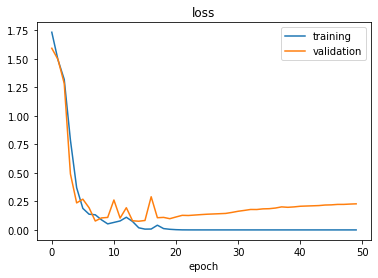

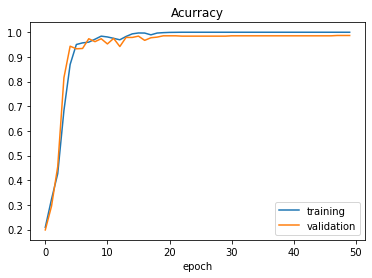

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()


In [ ]:
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.10149100422859192
Test Accuracy: 0.9884210228919983


In [ ]:
# Luu model da train ra file
model.save('models/model_good.h5')